# Prioritizing Factors in Acceleration of Gender Equality Development

The UN defines female literacy rate as a key effect of gender equality. Gender equality is UN Sustainable Development Goal (SDG) #5. This goal specifically acts to achieve a better and more sustainable future through the lens of gender. Clearly, gender equality is an important aspect of global development. 

Accelerating female literacy rates gives us a tangible outcome that we can find factors associated with, rather than simply using a calculated score or rating such as the UN's Gender Development Index. Thus, we wanted to find which indicators should be prioritized in order to optimize for this outcome. 

To do this, we visualized which factors relating to gender equality are highly correlated with female literacy rate. We selected these factors by looking at UN datasets that related to UN-defined gender equality indicators. We performed the visualization with a linear regression model that measured these indicators against female literacy rate. 

As an additional step, we implemented a multilinear regression model and determined the correlation weights of these indicators in relation to female literacy rates. This would help inform humanitarian and international oranizations where efforts should be focused to have the largest impact on improving gender equality.

<b>Authors:</b> Casey Lei, Chiraag Balu, Chris Zhan, Heather Yuan, Kaitlyn Phan

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

## Essential Functions

In [10]:
def standardize(dataframe_column):
    """
    This function converts a column in a dataframe into standard units"
    dataframe_column(array): the column as an array
    
    returns an array of standardized numbers
    """
    return (dataframe_column - np.mean(dataframe_column)) / np.std(dataframe_column)

In [11]:
def strip_space(dataframe):
    '''
    Removes the space in front of items in a column labeled Country
    dataframe(dataframe): the dataframe that needs to be stripped
    
    returns a dataframe that is stripped
    '''
    dataframe['Country'] = dataframe['Country'].astype(str).str.strip()
    return dataframe

In [12]:
def clean_for_year(dataframe, label, year):
    '''
    Cleans and standardizes a dataframe for closest year rather than a range
    label(string) = Factor that is being examined
    year(int, string) = the exact year(int) or year range(string) being examined

    returns a cleaned dataframe
    '''
    dataframe = dataframe[['Country', year]].rename(columns = {year : "year"})
    dataframe["Standardized "+label+" Rates"] = standardize(pd.to_numeric(dataframe['year'], errors='coerce'))
    dataframe = strip_space(dataframe)
    dataframe = dataframe[['Country', 'Standardized ' + label + ' Rates']]
    dataframe = dataframe.dropna()
    dataframe = dataframe[dataframe["Standardized " + label + " Rates"] != '..']
    return dataframe

In [13]:
def merge_for_year(dataframe, label, year):
    '''
    Merges a cleaned dataframe with genderlit2018. 
    dataframe(dataframe) = desired dataframe to merge
    label(string) = Factor that is being examined
    year(int, string) = the exact year(int) or year range(string) being examined

    returns a cleaned dataframe'''
    clean_dataframe = clean_for_year(dataframe, label, year)
    lit_and_dataframe = genderlit2018.merge(clean_dataframe, on='Country', how='inner', indicator= True)
    lit_and_dataframe = lit_and_dataframe.dropna()
    lit_and_dataframe = lit_and_dataframe[lit_and_dataframe["Standardized " + label + " Rates"] != '..']
    return lit_and_dataframe
    #lit_and_dataframe = genderlit2018.merge(dataframe, on='Country', how='inner', indicator=True)
    #return lit_and_dataframe

## Main Dataframe

This section creates and cleans a dataframe to create the main dataframe that will be compared to the UN indicators. The dataframe describes the literacy rate of adult females, where adult is defined as 15 or older. 

We decided to use the 2018 female literacy rate because it was the most balanced when evaluating for recency and volume of data.

Definition: Percentage of adult females (15 or older) who can read and write.

Source: https://data.worldbank.org/indicator/SE.ADT.LITR.FE.ZS

In [14]:
gender_lit = pd.read_excel('datasets/gender_literacy.xls')
genderlit2018 = gender_lit[["Country Name", "2018"]]
genderlit2018 = genderlit2018.dropna().rename(columns={"Country Name" : "Country"})
genderlit2018["Standardized Literacy Rate"] = standardize(genderlit2018["2018"])
genderlit2018.head()

,Country,2018,Standardized Literacy Rate
0,Aruba,97.812683,0.916278
5,Albania,97.761124,0.913742
7,Arab World,65.530319,-0.671382
9,Argentina,99.062042,0.977722
18,Benin,31.071650,-2.366073


### GDI (Gender Development Index)

This section establishes that female literacy rate is an outcome of gender equality by determining its correlation with the UN metric of Gender Development Index using linear regression. We merged the Female Literacy Rate (2018) with GDI information from 2020. 

GDI is defined as the ratio of female to male HDI values, which acts as a metric for gender equality. 

Source: Data calculated by the UN from http://hdr.undp.org/sites/default/files/hdr2020.pdf

Refer to image below to see which factors are used to calculate female and male HDI values.

In a later section on linear regression, we determined that the correlation coefficient between Female Literacy Rate (2018) and GDI was 0.82, which supports our statement that female literacy rate is an outcome of gender equality. 


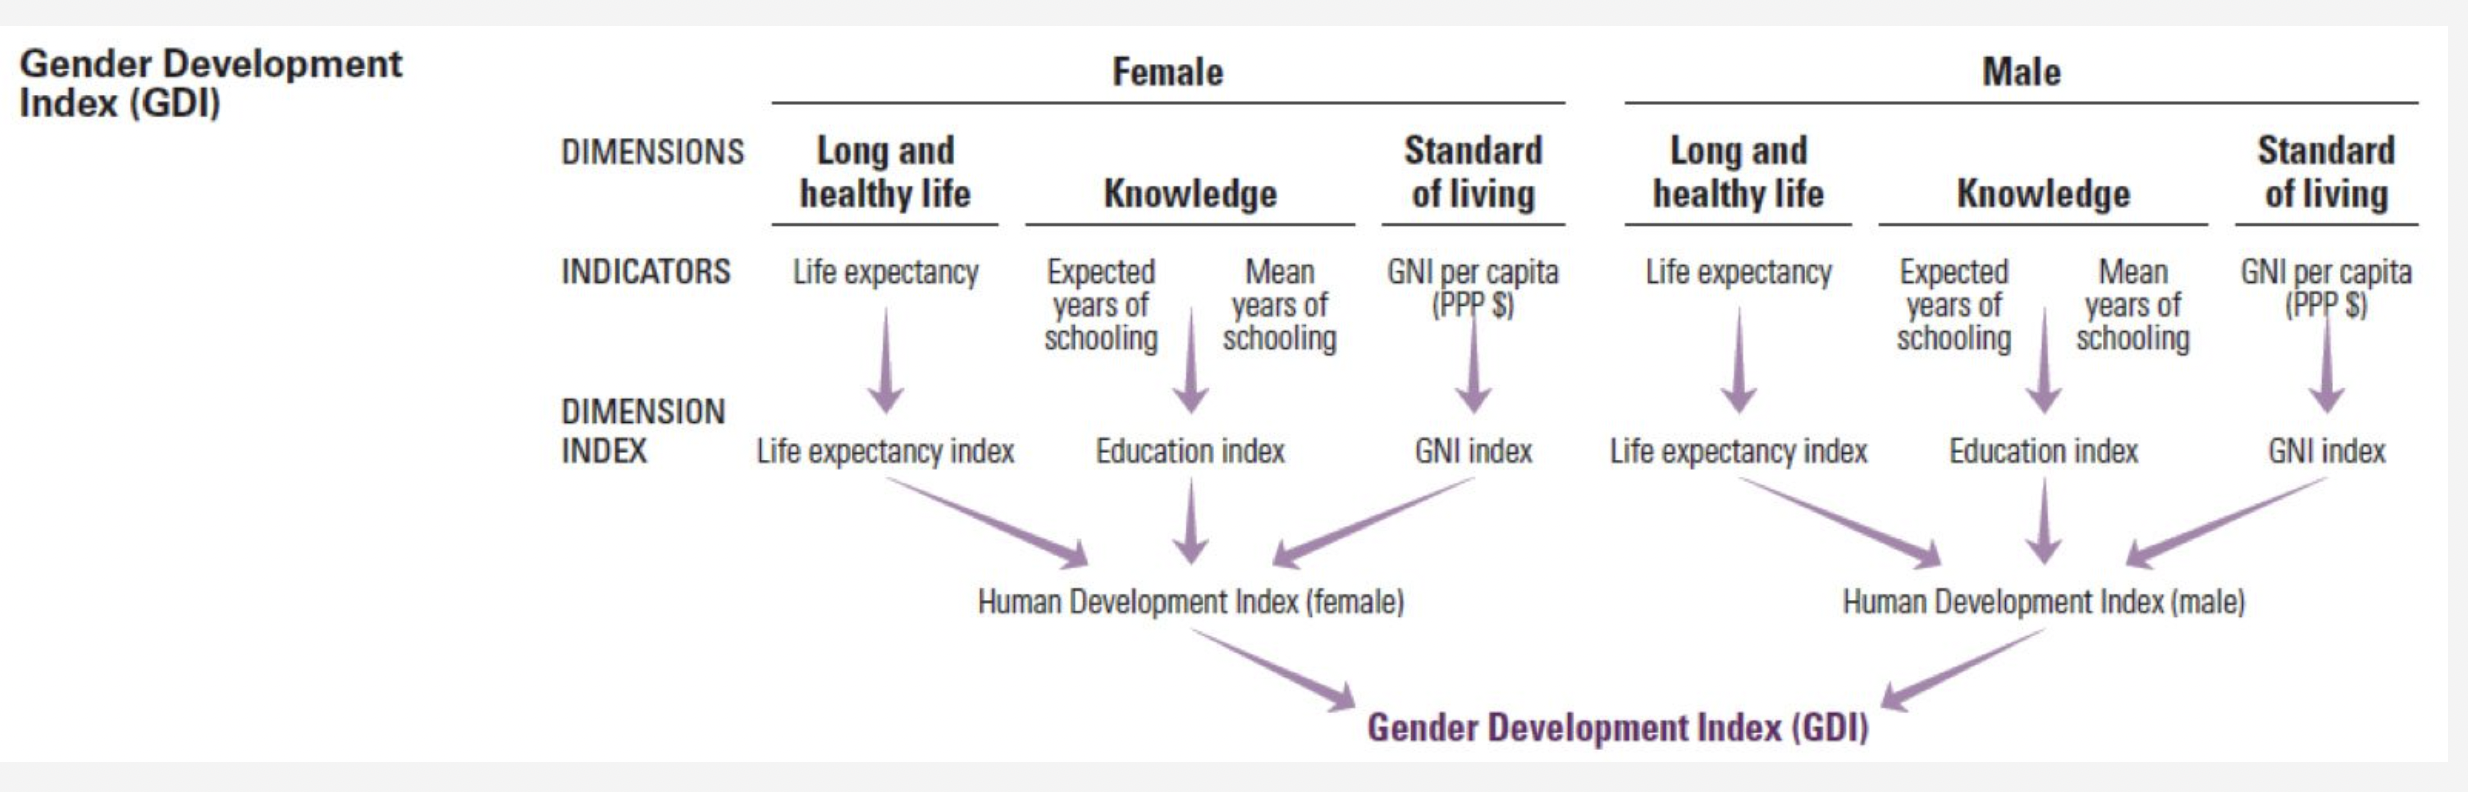

In [15]:
from IPython import display
display.Image('Calculating HDR.png')

In [16]:
hdi_gdi = pd.read_excel('datasets/hdi_gdi.xlsx')
hdi_gdi = hdi_gdi.drop("Group", axis=1).rename(columns={"Value": "GDI Value", "Female": "Female HDI", "Male": "Male HDI"})
hdi_gdi.head()

,HDI rank,Country,GDI Value,Female HDI,Male HDI
0,1,Norway,0.989939,0.948956,0.958601
1,2,Ireland,0.981024,0.943043,0.961284
2,2,Switzerland,0.967513,0.933877,0.965235
3,4,"Hong Kong, China (SAR)",0.972323,0.932829,0.959382
4,4,Iceland,0.968674,0.933168,0.963345


In [17]:
cleaned_hdi_gdi = hdi_gdi[["HDI rank", "Country", "GDI Value", "Female HDI"]]
lit_and_hdi_gdi = genderlit2018.merge(cleaned_hdi_gdi, on='Country', how='inner', indicator=True)
lit_and_hdi_gdi["Standardized GDI Value"] = standardize(pd.to_numeric(lit_and_hdi_gdi["GDI Value"], errors='coerce'))
lit_and_hdi_gdi["Standardized Female HDI"] = standardize(pd.to_numeric(lit_and_hdi_gdi["Female HDI"], errors='coerce'))
lit_and_hdi_gdi.dropna().head()

,Country,2018,Standardized Literacy Rate,HDI rank,GDI Value,Female HDI,_merge,Standardized GDI Value,Standardized Female HDI
0,Albania,97.761124,0.913742,69,0.966825,0.780397,both,0.510914,0.725964
1,Argentina,99.062042,0.977722,46,0.993452,0.834896,both,0.908410,1.082811
2,Benin,31.071650,-2.366073,158,0.8546,0.501745,both,-1.164447,-1.098562
3,Burkina Faso,31.044081,-2.367429,182,0.866708,0.417895,both,-0.983697,-1.647590
4,Bangladesh,71.181938,-0.393433,133,0.904042,0.596227,both,-0.426345,-0.479924


<AxesSubplot:xlabel='Standardized Literacy Rate', ylabel='Standardized GDI Value'>

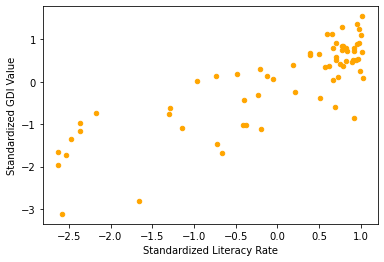

In [18]:
lit_and_hdi_gdi.plot.scatter(x='Standardized Literacy Rate', 
y='Standardized GDI Value',
c='Orange')

## Cleaning of UN Indicator Data

This section imports indicators from UN datasets. Each UN SDG indicator dataset is imported as a dataframe, merged with the main dataframe consisting of female literacy rate (2018), and then cleaned to remove missing values.  Note that in certain indicator datasets, we used the most recent year of data. In other datasets, data was aggregated to be a range of years, and data refers to the most recent year in that time period. 

We selected data based on the UN Sustainable Development Goal (SDG) Indicators for Gender Equality. They are listed as follows:

5.1 - Eliminate Discrimination

5.2 - Eliminate Violence

5.3 - Eliminate Harmful Practices(child/early/forced marriages, female genital mutilation)

5.4 - Value Unpaid/Domestic Care Work

5.5 - Ensure Women's Full/Equal Participation and Equal Opportunity for Leadership Roles

5.6 - Ensure Universal Access to Sexual and Reproductive Health and Reproductive Rights

5.a - Give Women Equal Rights to Property

We found one dataset for each indicator. 

A copy of each dataframe has columns ['Literary Rate'] and ['Indicator'] standardized for use in multiple linear regression in the final section.  

Scatter plots with standardized data were created to provide an initial idea on possible correlation. 

### Total Unemployment Ratio (Female to Male Ratio) (SDG Indicator 5.1)

Definition: Ratio of the percentage of the female labour force population ages 15 and older that is not in paid employment or self-employed but is available for work and is actively seeking paid employment or self-employment to the percentage of the male labour force population ages 15 and older that is not in paid employment or self-employed but is available for work and is actively seeking paid employment or self-employment.

More succinctly: ratio of unemployed adult women to ratio of unemployed men

Source: HDRO calculations based on ILO (International Labour Organization) (2020). ILOSTAT database. https://ilostat.ilo.org/data/. Accessed 21 July 2020.

In [19]:
unemployment = pd.read_excel('datasets/unemployment_ftm_ratio.xls')
clean_unemployment = clean_for_year(unemployment, 'Unemployment', 2018)
clean_unemployment.sort_values(by="Standardized Unemployment Rates", ascending=False)

,Country,Standardized Unemployment Rates
169,United Arab Emirates,5.428438
162,Tonga,4.487410
156,Syrian Arab Republic,4.025451
76,Iraq,3.033093
48,Egypt,2.673792
...,...,...
65,Guinea,-1.141651
13,Belarus,-1.158760
25,Burundi,-1.244308
166,Turkmenistan,-1.466733


In [20]:
lit_and_unemployment2018 = merge_for_year(unemployment, 'Unemployment', 2018)
lit_and_unemployment2018.head()

,Country,2018,Standardized Literacy Rate,Standardized Unemployment Rates,_merge
0,Albania,97.761124,0.913742,-0.731020,both
1,Argentina,99.062042,0.977722,0.004693,both
2,Benin,31.071650,-2.366073,-0.200622,both
3,Burkina Faso,31.044081,-2.367429,1.869640,both
4,Bangladesh,71.181938,-0.393433,1.287913,both


<AxesSubplot:xlabel='Standardized Literacy Rate', ylabel='Standardized Unemployment Rates'>

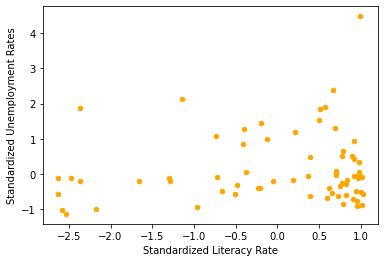

In [21]:
lit_and_unemployment2018.plot.scatter(x='Standardized Literacy Rate', 
y="Standardized Unemployment Rates",c='Orange')

### Violence against women ever experienced, intimate partner (SDG Indicator 5.2)

Definition: Percentage of the female population ages 15 and older that has ever experienced physical and/or sexual violence from an intimate partner.

Source: UN Women (United Nations Entity for Gender Equality and the Empowerment of Women). 2019. UN Women Global Database on Violence against Women. New York. http://evaw-global-database.unwomen.org. Accessed 10 June 2019.

Note that '2005-2019' indicates that the most recent data from this time period is used.

In [22]:
domestic_violence = pd.read_excel('datasets/Violence against women ever experienced, intimate partner (% of female population ages 15 and older).xlsx')
domestic_violence = domestic_violence[domestic_violence['2005-2019'] != '..'].dropna().iloc[:127, :]
clean_domestic_violence = clean_for_year(domestic_violence, 'Domestic Violence', '2005-2019')
lit_and_domestic_violence = merge_for_year(domestic_violence, 'Domestic Violence', '2005-2019')
lit_and_domestic_violence.head()


,Country,2018,Standardized Literacy Rate,Standardized Domestic Violence Rates,_merge
0,Albania,97.761124,0.913742,-0.525102,both
1,Argentina,99.062042,0.977722,-0.088459,both
2,Benin,31.071650,-2.366073,-0.317882,both
3,Burkina Faso,31.044081,-2.367429,-1.228171,both
4,Bangladesh,71.181938,-0.393433,1.931939,both


<AxesSubplot:xlabel='Standardized Literacy Rate', ylabel='Standardized Domestic Violence Rates'>

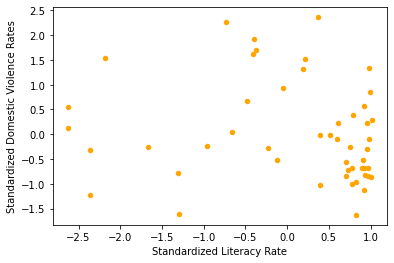

In [23]:

lit_and_domestic_violence.plot.scatter(x='Standardized Literacy Rate', 
y="Standardized Domestic Violence Rates",c='Orange')

### Child marriage (SDG Indicator 5.3)

Definition: Percentage of women ages 20-24 who were first married or in union before age 18.

Source: United Nations Statistics Division (2020a). Global SDG Indicators Database. https://unstats.un.org/sdgs/indicators/database/. Accessed 21 July 2020.


In [24]:
child_marriage = pd.read_excel('datasets/child_marriage.xlsx')
clean_child_marriage = clean_for_year(child_marriage, 'Child Marriage', '2005-2019')
lit_and_child_marriage = merge_for_year(child_marriage, 'Child Marriage', '2005-2019')
lit_and_child_marriage.head()

,Country,2018,Standardized Literacy Rate,Standardized Child Marriage Rates,_merge
0,Albania,97.761124,0.913742,-0.824392,both
1,Benin,31.071650,-2.366073,0.513310,both
2,Burkina Faso,31.044081,-2.367429,1.991824,both
3,Bangladesh,71.181938,-0.393433,2.484662,both
4,Brazil,93.425072,0.700493,0.161283,both


<AxesSubplot:xlabel='Standardized Literacy Rate', ylabel='Standardized Child Marriage Rates'>

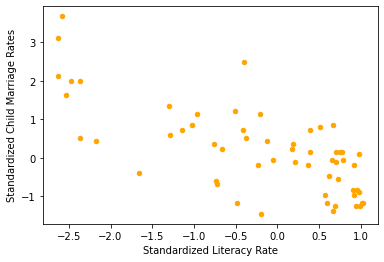

In [25]:
lit_and_child_marriage.plot.scatter(x='Standardized Literacy Rate', 
y="Standardized Child Marriage Rates",c='Orange')

### Mandatory paid maternity leave (days) (SDG Indicator 5.4)

Definition: The mandatory minimum number of calendar days that legally must be paid by the government, the employer or both. It refers to leave related to the birth of a child that is available only to the mother; it does not cover parental leave that is available to both parents.

Source: World Bank (2020b). Gender Statistics database. Washington, DC. http://data.worldbank.org. Accessed 21 July 2020.

In [26]:
maternity_leave = pd.read_excel('datasets/maternity_leave.xls')
clean_maternity_leave = clean_for_year(maternity_leave, 'Maternity Leave', 2019)
lit_and_maternity2019 = merge_for_year(maternity_leave, 'Maternity Leave', 2019)
lit_and_maternity2019.sort_values(by="Standardized Maternity Leave Rates", ascending=False)

,Country,2018,Standardized Literacy Rate,Standardized Maternity Leave Rates,_merge
22,India,65.790810,-0.658571,1.584645,both
23,Italy,98.971916,0.973289,0.921311,both
50,Russian Federation,99.734108,1.010774,0.714019,both
7,China,95.159332,0.785785,0.465269,both
49,Romania,98.599770,0.954987,0.423810,both
...,...,...,...,...,...
43,Nepal,59.724430,-0.956918,-0.944317,both
52,Sudan,56.063229,-1.136977,-1.027234,both
44,Oman,92.693993,0.664538,-1.151609,both
36,Montenegro,98.271347,0.938835,-1.255255,both


<AxesSubplot:xlabel='Standardized Literacy Rate', ylabel='Standardized Maternity Leave Rates'>

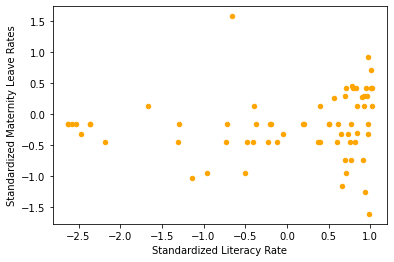

In [27]:
lit_and_maternity2019.plot.scatter(x='Standardized Literacy Rate', 
y='Standardized Maternity Leave Rates',c='Orange')

### Share of seats in parliament (SDG Indicator 5.5)

Definition: Proportion of seats held by women in the national parliament expressed as a percentage of total seats. For countries with a bicameral legislative system, the share of seats is calculated based on both houses.

Source: IPU (2020). Parline database: Monthly ranking of women in national parliaments. https://data.ipu.org/women-ranking. Accessed 29 July 2020.

In [28]:
parliament_share = pd.read_excel('datasets/parliament_share.xlsx')
clean_parliament_share = clean_for_year(parliament_share, 'Parliament Share', 2018)


lit_and_parliament2018 = merge_for_year(parliament_share, 'Parliament Share', 2018)
lit_and_parliament2018.head()

,Country,2018,Standardized Literacy Rate,Standardized Parliament Share Rates,_merge
0,Albania,97.761124,0.913742,0.519780,both
1,Argentina,99.062042,0.977722,1.569088,both
2,Benin,31.071650,-2.366073,-1.352692,both
3,Burkina Faso,31.044081,-2.367429,-1.008953,both
4,Bangladesh,71.181938,-0.393433,-0.167698,both


<AxesSubplot:xlabel='Standardized Literacy Rate', ylabel='Standardized Parliament Share Rates'>

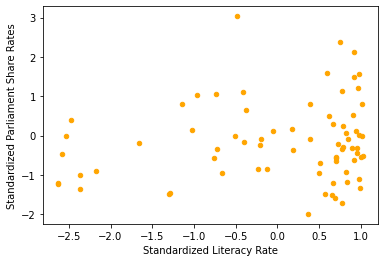

In [29]:
lit_and_parliament2018.plot.scatter(x='Standardized Literacy Rate', 
y='Standardized Parliament Share Rates',c='Orange')


### Contraceptive Prevalence (SDG Indicator 5.6)

Definition: Percentage of married or in-union women of reproductive age (15-49 years) currently using any contraceptive method.

Source: UNDESA (2020). World Contraceptive Use 2020. New York. https://www.un.org/en/development/desa/population/publications/dataset/contraception/wcu2020.asp. Accessed 21 July 2020.

In [30]:
contraceptive_prevalence = pd.read_excel('datasets/contraceptive_prevalence.xls')
clean_contraceptive_prevalence = clean_for_year(contraceptive_prevalence, 'Contraceptive Prevalence', '2009-2019')
clean_contraceptive_prevalence.head()


,Country,Standardized Contraceptive Prevalence Rates
0,Afghanistan,-1.432893
1,Albania,-0.176593
2,Algeria,0.337980
3,Angola,-1.673954
4,Argentina,1.459842


<AxesSubplot:xlabel='Standardized Literacy Rate', ylabel='Standardized Contraceptive Prevalence Rates'>

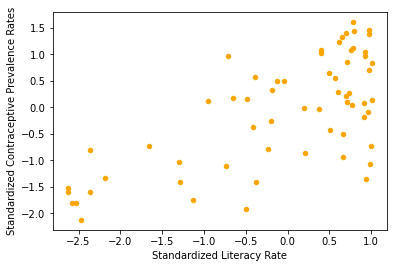

In [31]:
lit_and_contraceptive_prevalence = merge_for_year(contraceptive_prevalence, 'Contraceptive Prevalence', '2009-2019')
lit_and_contraceptive_prevalence.plot.scatter(x='Standardized Literacy Rate', 
y='Standardized Contraceptive Prevalence Rates',c='Orange')

### Financial Independence (SDG Indicator 5.a)

Definition: Percentage of women ages 15 and older who report having an account alone or jointly with someone else at a bank or other type of financial institution or who report personally using a mobile money service in the past 12 months.

Source: World Bank (2020b). Gender Statistics database. Washington, DC. http://data.worldbank.org. Accessed 21 July 2020.


In [32]:
financial_independence = pd.read_excel('datasets/financial_independence.xls')
clean_financial_independence = clean_for_year(financial_independence, 'Financial Independence', 2017)
clean_financial_independence.head()

,Country,Standardized Financial Independence Rates
0,Afghanistan,-1.657812
1,Albania,-0.594373
2,Algeria,-0.897230
3,Angola,-1.138138
4,Argentina,-0.157296


<AxesSubplot:xlabel='Standardized Literacy Rate', ylabel='Standardized Financial Independence Rates'>

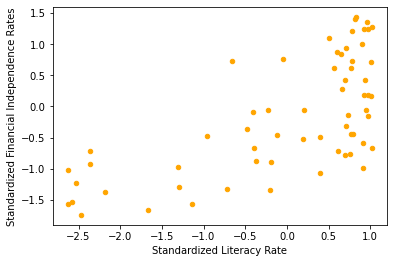

In [33]:
lit_and_financial_independence = merge_for_year(financial_independence, 'Financial Independence', 2017)
lit_and_financial_independence.plot.scatter(x='Standardized Literacy Rate', 
y='Standardized Financial Independence Rates',c='Orange')

## Linear Regression

In this section, the imported indicator dataframes are merged with the Female Literacy Rate (2018) dataframe. Using seaborn.regplot, we created linear regression plots that visualize the correlation between Female Literacy Rate (2018) and the UN Indicators. We also used scipy.stats to calculate the correlation coefficient and printed it below each linear regression plot. 

Our insights from this section are located in Summary. 

In [34]:
from scipy import stats

In [35]:
def ns_clean_for_year(dataframe, label, year):
    '''Cleans a dataframe for year
    label = Factor you are examining
    year = int or str, the year we are examining'''
    df = dataframe[['Country', year]].rename(columns = {year : label + ' ' + '('+ str(year)+ ')'})
    df[label + ' ' + '('+ str(year)+ ')'] = pd.to_numeric(df[label + ' ' + '('+ str(year)+ ')'], errors='coerce')
    df = strip_space(df)
    df = df.dropna()
    df = df[df[label + ' ' + '('+ str(year)+ ')'] != '..']
    return df

In [36]:
def ns_merge_for_year(dataframe, label, year):
    '''Merges a dataframe with genderlit2018. dataframe is the dataframe you want to merge
    dataframe = dataframe you want to pass in
    label = Factor you are examining
    year = int, the year we are examining'''
    clean_dataframe = ns_clean_for_year(dataframe, label, year)
    lit_and_dataframe = non_standard_genderlit2018.merge(clean_dataframe, on='Country', how='inner', indicator= True)
    lit_and_dataframe = lit_and_dataframe.dropna()
    lit_and_dataframe = lit_and_dataframe[lit_and_dataframe[label + ' ' + '('+ str(year)+ ')'] != '..']
    return lit_and_dataframe

In [37]:
def seaborn_regression(dataframe, label, year):
    '''Takes in a cleaned merged dataframe and plots a Seaborn linear regression on it'''
    df = dataframe
    x_label = 'Literacy Rate (2018)'
    y_label = label + ' ' + '('+ str(year)+ ')'
    x_values = df[x_label].values.reshape(-1, 1)
    y_values = df[y_label]
    sns.regplot(x_values,y_values, color='#ffbb98')
    plt.title(x_label + " vs. " + y_label)
    plt.xlabel('Female Literacy Rate (2018)')
    plt.ylabel(y_label)
    plt.show()
    r = stats.pearsonr(df[x_label], df[y_label])[0]
    print ('Correlation Coefficient = ' + str(r))

### Gender Development Index

In [38]:
non_standard_genderlit2018 = gender_lit[["Country Name", "2018"]]
non_standard_genderlit2018 = non_standard_genderlit2018.dropna().rename(columns={"Country Name" : "Country"}).rename(columns={"2018" : "Literacy Rate (2018)"})
non_standard_hdi_gdi = hdi_gdi[["HDI rank", "Country", "GDI Value", "Female HDI"]]
non_standard_lit_gdi = non_standard_genderlit2018.merge(non_standard_hdi_gdi, on='Country', how='inner', indicator=True)
non_standard_lit_gdi = non_standard_lit_gdi.dropna()
non_standard_lit_gdi = non_standard_lit_gdi[non_standard_lit_gdi['Literacy Rate (2018)'] != '..']
non_standard_lit_gdi = non_standard_lit_gdi[non_standard_lit_gdi['GDI Value'] != '..']
non_standard_lit_gdi['GDI Value'] = pd.to_numeric(non_standard_lit_gdi['GDI Value'], errors='coerce')
non_standard_lit_gdi = non_standard_lit_gdi[non_standard_lit_gdi['Female HDI'] != '..']
non_standard_lit_gdi['Female HDI'] = pd.to_numeric(non_standard_lit_gdi['Female HDI'], errors='coerce')

non_standard_lit_gdi.head()

,Country,Literacy Rate (2018),HDI rank,GDI Value,Female HDI,_merge
0,Albania,97.761124,69,0.966825,0.780397,both
1,Argentina,99.062042,46,0.993452,0.834896,both
2,Benin,31.071650,158,0.854600,0.501745,both
3,Burkina Faso,31.044081,182,0.866708,0.417895,both
4,Bangladesh,71.181938,133,0.904042,0.596227,both


C:\Users\chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


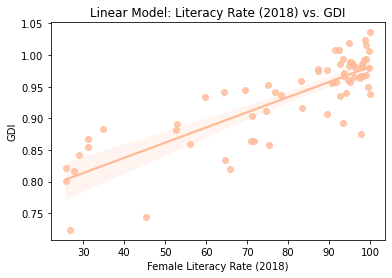

Correlation Coefficient = 0.8244854474786989


In [39]:
sns.regplot(non_standard_lit_gdi['Literacy Rate (2018)'].values.reshape(-1,1), non_standard_lit_gdi['GDI Value'].values, color='#ffbb98')
plt.title("Linear Model: Literacy Rate (2018) vs. GDI")
plt.xlabel('Female Literacy Rate (2018)')
plt.ylabel('GDI')
plt.show()
r = stats.pearsonr(non_standard_lit_gdi['Literacy Rate (2018)'], non_standard_lit_gdi['GDI Value'])[0]
print ('Correlation Coefficient = ' + str(r))

### Total Unemployment Ratio

C:\Users\chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


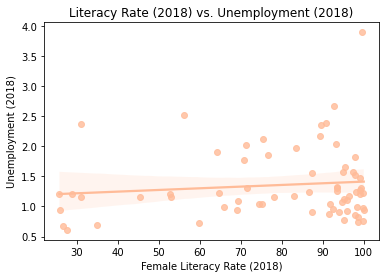

Correlation Coefficient = 0.11006520011700414


In [40]:
ns_lit_unemployment = ns_merge_for_year(unemployment, 'Unemployment', 2018)
seaborn_regression(ns_lit_unemployment, 'Unemployment', 2018)

### Domestic Violence against Women

C:\Users\chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


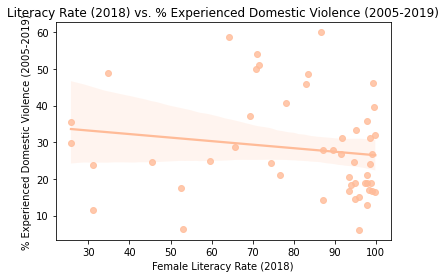

Correlation Coefficient = -0.15822576624458873


In [41]:
ns_lit_domestic_violence = ns_merge_for_year(domestic_violence, '% Experienced Domestic Violence', '2005-2019')
seaborn_regression(ns_lit_domestic_violence, '% Experienced Domestic Violence', '2005-2019')

### Child Marriage (% of women married by 18)

C:\Users\chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


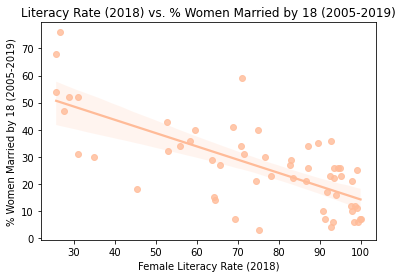

Correlation Coefficient = -0.7100360915023078


In [42]:
ns_lit_child_marriage = ns_merge_for_year(child_marriage, '% Women Married by 18', '2005-2019')
seaborn_regression(ns_lit_child_marriage, '% Women Married by 18', '2005-2019')

### Maternity Leave

C:\Users\chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


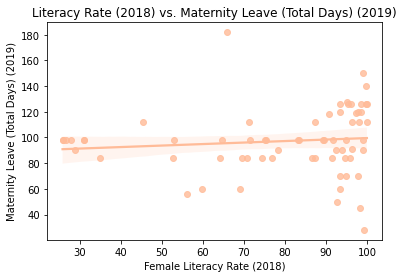

Correlation Coefficient = 0.10729178542423899


In [43]:
ns_lit_maternity_leave = ns_merge_for_year(maternity_leave, 'Maternity Leave (Total Days)', 2019)
seaborn_regression(ns_lit_maternity_leave, 'Maternity Leave (Total Days)', 2019)

### Share of Seats in Parliament (% held by women)

C:\Users\chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


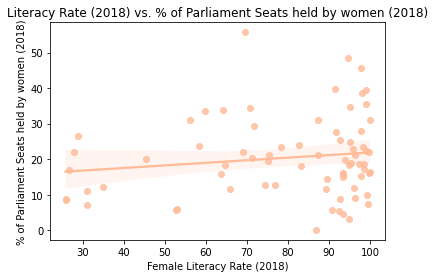

Correlation Coefficient = 0.14789196033822485


In [44]:
ns_lit_parliament_share = ns_merge_for_year(parliament_share, '% of Parliament Seats held by women', 2018)
seaborn_regression(ns_lit_parliament_share, '% of Parliament Seats held by women', 2018)

### Share of seats held by women in local government (%)

SDG 5.5 Ensure women's full and effective participation and equal opportunities for leadership at all levels of decision-making in political, economic and public life

Definition: Proportion of elected positions held by women in legislative/deliberative bodies of local government, expressed as a percentage of total elected positions in those bodies.

Source: United Nations Statistics Division (2020a). Global SDG Indicators Database. https://unstats.un.org/sdgs/indicators/database/. Accessed 21 July 2020.

C:\Users\chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


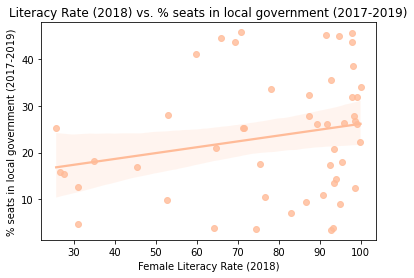

Correlation Coefficient = 0.22273292746561646


In [45]:
local_govt_share = pd.read_excel('datasets/local_govt_share.xlsx')
ns_local_govt_share = ns_merge_for_year(local_govt_share, '% seats in local government', '2017-2019')
seaborn_regression(ns_local_govt_share, '% seats in local government', '2017-2019')

### Maternal Mortality (deaths per 100,000 births)

Definition: Number of deaths due to pregnancy-related causes per 100,000 live births.

Source: WHO, UNICEF, UNFPA, World Bank Group and United Nations Population Division (2019). Trends in Maternal Mortality: 2000 to 2017: Estimates by WHO, UNICEF, UNFPA, World Bank Group and the United Nations Population Division. Geneva: World Health Organization. www.who.int/reproductivehealth/publications/maternal-mortality-2000-2017/. Accessed 4 August 2020.

C:\Users\chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


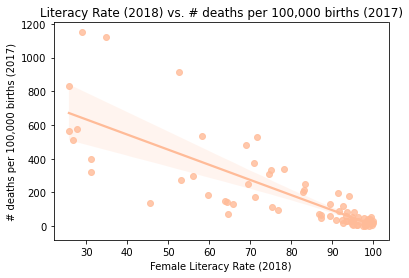

Correlation Coefficient = -0.802842683101725


In [46]:
maternal_mortality = pd.read_excel('datasets/maternal_mortality.xlsx')
ns_lit_maternal_mortality = ns_merge_for_year(maternal_mortality, '# deaths per 100,000 births', 2017)
seaborn_regression(ns_lit_maternal_mortality, '# deaths per 100,000 births', 2017)

### Contraceptive Prevalence (% of married women using)

C:\Users\chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


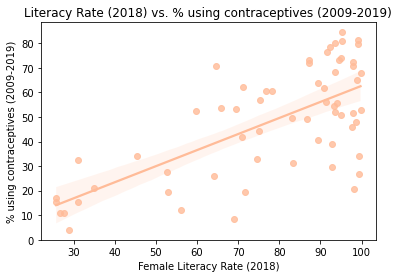

Correlation Coefficient = 0.6822909329470592


In [47]:
ns_lit_contraceptive_prevalence = ns_merge_for_year(contraceptive_prevalence, '% using contraceptives', '2009-2019')
seaborn_regression(ns_lit_contraceptive_prevalence, '% using contraceptives', '2009-2019')

### Financial Independence

C:\Users\chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


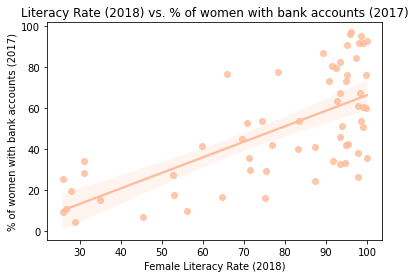

Correlation Coefficient = 0.6704994940060236


In [48]:
ns_lit_financial_independence = ns_merge_for_year(financial_independence, '% of women with bank accounts', 2017)
seaborn_regression(ns_lit_financial_independence, '% of women with bank accounts', 2017)

### Summary

Note: we added two more datasets after noticing some interesting correlations. We noticed that indicators related to reproductive health appered to be highly correlated with Female Literacy Rate (2018), so we added a dataset on maternal mortality. We also wondered if % local government share would be any different from % parliament share. 

After determining the correlation coefficients for various indicators with respect to the Female Literacy Rate (2018), we decided to plot the correlation coefficients on an overlaid bargraph to compare the r values to each other. 

We wanted to see if there were trends that were immediately observable.

After plotting the r values, we noticed that SDG Indicator 5.6 (Ensure Universal Access to Sexual and Reproductive Health and Reproductive Rights) had two datasets that were strongly correlated with Female Literacy Rate (2018). Maternal Mortality was strongly negtively correlated with Female Literacy Rate (2018). Contraceptive Prevalence was strongly positive correlated with Female Literacy Rate (2018). Additionally, SDG Indicator 5.3, associated with Child Marriage was also strongly negatively correlated with Female Literacy Rate (2018). 

Some additional analysis includes noticing that an increased share of women holding local government seats is more correlated with Female Literacy Rate than an increased share of women holding parliament seats.

Text(0, 0.5, 'Datasets associated with UN SDG Indicators')

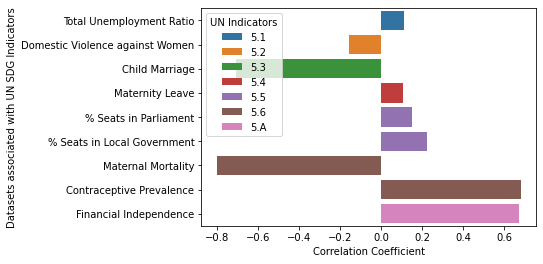

In [49]:
# Plotting coefficients on a bar graph grouped by indicator
indicator_correlation = pd.read_excel('datasets/indicator_correlation.xlsx')
#sns.catplot(
    #data=indicator_correlation, kind="bar",
 #   x="r", y="Indicator", hue="UN Indicators",
 #   palette="dark", height=6, orient='h')
sns.barplot(x="r", y="Indicator", hue="UN Indicators", orient='h', data=indicator_correlation,dodge=False)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Datasets associated with UN SDG Indicators')


## Multiple Linear Regression

Using Multiple Linear Regression, we can take many independent variables and analyze their correlation to a single dependent variable. in our model, these independent variables are the 'features' of the model, and the dependent variable is our model's 'target'.

n Simple Linear Regression, one independent variable is correlated with one dependent variable. as a result, the plot of this regression is two dimensional, one dimension for each variable. 

the equation of the regression line is as follows: 

y = mx+b

where m is the slope, or the expected increase in y value for an increase in the x value

since we have 7 independent variables for the multiple linear regression, we're working in 7 dimensions. 

our equation is as follows:

y = b1x1 + b2x2 ... + b7x7 + b0 + e

the key values here are the b# values. these correspond to the weights for each of our independent variables. 

for example, if b1 were to be double the value of b2, it means that a change of 10 units in b2 would have the same impact as a change of 5 units in b1. 

we're fitting this model to find the weights of correlations for our SDG indicators with our outcome variable of literacy rate. 

this means that the highest weight correlations that we find are likely the factors that have the most impact on literacy rate, and should be prioritized

In [50]:
#Creating Clean Dataframe for MLR

#cleaning values/data
std_gl_series = genderlit2018['Standardized Literacy Rate']
std_tu_series = clean_unemployment['Standardized Unemployment Rates']
std_dv_series = clean_domestic_violence['Standardized Domestic Violence Rates']
std_cm_series = clean_child_marriage['Standardized Child Marriage Rates']
std_ml_series = clean_maternity_leave['Standardized Maternity Leave Rates']
std_ps_series = clean_parliament_share['Standardized Parliament Share Rates']
std_cp_series = clean_contraceptive_prevalence['Standardized Contraceptive Prevalence Rates']
std_fi_series = clean_financial_independence['Standardized Financial Independence Rates']

#merging series
merged_factors = pd.concat([std_gl_series,std_tu_series,std_dv_series,std_cm_series,std_ml_series,std_ps_series, std_cp_series, std_fi_series], axis = 1)
merged_factors_dropped = merged_factors.dropna()

In [51]:
#Multiple Linear Regression

#features and target
X = merged_factors_dropped[['Standardized Unemployment Rates','Standardized Domestic Violence Rates','Standardized Child Marriage Rates','Standardized Maternity Leave Rates','Standardized Parliament Share Rates','Standardized Contraceptive Prevalence Rates' ,'Standardized Financial Independence Rates']].values
y = merged_factors_dropped[['Standardized Literacy Rate']].values

#model creation
multiple_linear_model = LinearRegression()
multiple_linear_model.fit(X,y)

LinearRegression()

[Text(0, 0.5, 'Features'), Text(0.5, 0, 'Correlation Weights')]

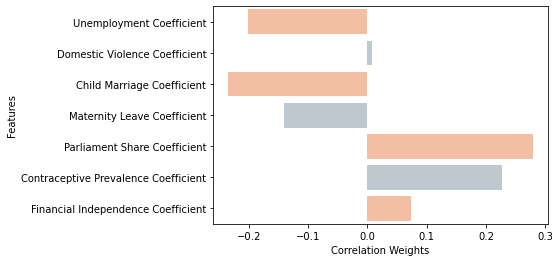

In [52]:
#Plotting Coefficients

#coefficient formatting
coefficients = pd.DataFrame(multiple_linear_model.coef_)
coefs = coefficients.rename(columns={0: 'Unemployment Coefficient',1 : 'Domestic Violence Coefficient',2 : 'Child Marriage Coefficient',3 : 'Maternity Leave Coefficient',4 : 'Parliament Share Coefficient',5 : 'Contraceptive Prevalence Coefficient',6 : 'Financial Independence Coefficient'})
c = coefs.iloc[0]
coefs_abs = coefs.abs()
c_abs = coefs_abs.iloc[0]

#plotting
fig = sns.barplot(y=coefs.columns, x=c, palette=['#ffbb98','#bac8d3'])
fig.set(ylabel='Features', xlabel='Correlation Weights')



## Conclusion

Gender equality is an important goal for global sustainable development. We confirmed the UN insight that Female Literacy Rates (2018) are an outcome of Gender Equality. The UN Sustainable Development Goal #5: Gender Equality describes are usedseveral indicators that measure gender equality. 

Using linear regression, we found the correlations between Female Literacy Rates (2018) and UN SDG indicators. This process revealed that UN Gender Equality Indicators 5.3 and 5.5 for harmful practices and reproductive health were the most correlated with female literacy. We would thus recommend organizations and countries priorize reducing child marriages, reducing maternal mortality and increasing contraceptive use, and other factors classified under these indicators in order to have the greatest effect on improving gender equality. 

Insights from multiple linear regression allows us to also recommend developing countries to prioritize UN Gender Equality Indicators 5.4, ensuring women's full and equal participation in leadership, in order to accelerate global gender equality outcomes. 


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e55dd33e-a8ba-4445-bee4-33547a0b56d1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>